In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [5]:
from wordcloud import WordCloud

In [6]:
import streamlit as st

In [7]:
metadat = pd.read_csv(r"metadata.csv")

C:\Users\bmumo\AppData\Local\Temp\ipykernel_30120\1568618148.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  metadat = pd.read_csv(r"metadata.csv")


In [ ]:
metadata = metadat
metadata.columns
metadata.info

<bound method DataFrame.info of          cord_uid                                                sha  \
0        ug7v899j           d1aafb70c066a2068b02786f8929fd9c900897fb   
1        02tnwd4m           6b0567729c2143a66d737eb0a2f63f2dce2e5a7d   
2        ejv2xln0           06ced00a5fc04215949aa72528f2eeaae1d58927   
3        2b73a28n           348055649b6b8cf2b9a376498df9bf41f7123605   
4        9785vg6d           5f48792a5fa08bed9f56016f4981ae2ca6031b32   
...           ...                                                ...   
1056655  aeuy92bx  d86cfba423427426c10fa9092748733f5c7ca7e0; a8e5...   
1056656  n8hlrknq           b98985f125c3391aac709332e6380fe8b11ef6e5   
1056657  05dxn54t           0d1698212a1fcbbed2ffff38953397b3fb82f30d   
1056658  zpeij14g           9b2bbb5ceb21084931b5de7e0d60633e524a20bb   
1056659  pq54lvya           c7ae1a19b70e6e2806b670e4c0f64d3043698ee1   

                       source_x  \
0                           PMC   
1                           PMC  

In [ ]:
metadata.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [ ]:
#Check missing values
metadata.isnull().sum()

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

In [ ]:
#Basic statistic of our data
metadata.describe()

,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


In [ ]:
#All columns
metadata.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

Lets focus on the important colmns we are to use.

In [ ]:
#Find the total number of missing values in columns we are gonna use.
cols = ['title','publish_time','abstract', 'journal']
metadata[cols].isnull().sum()

title              503
publish_time      1814
abstract        235544
journal          87322
dtype: int64

In [ ]:
#drop rows where title is missing.
metadata.dropna(subset=["title"])

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056655,aeuy92bx,d86cfba423427426c10fa9092748733f5c7ca7e0; a8e5...,BioRxiv; MedRxiv; WHO,Potent neutralization of 2019 novel coronaviru...,10.1101/2020.02.01.929976,NaN,NaN,medrxiv,"2019-nCoV, which is a novel coronavirus emerge...",2020-02-02,"Lei, Changhai; Fu, Wenyan; Qian, Kewen; Li, Ti...",bioRxiv,NaN,NaN,NaN,document_parses/pdf_json/d86cfba423427426c10fa...,NaN,https://doi.org/10.1101/2020.02.01.929976,211121242.0
1056656,n8hlrknq,b98985f125c3391aac709332e6380fe8b11ef6e5,Elsevier; Medline; PMC,"Molecular-based diagnostics, including future ...",10.1016/j.mpmed.2013.08.012,PMC7108438,32288574.0,no-cc,Microbiology laboratories have traditionally r...,2013-10-28,"Goldenberg, Simon",Medicine (Abingdon),NaN,NaN,NaN,document_parses/pdf_json/b98985f125c3391aac709...,document_parses/pmc_json/PMC7108438.xml.json,https://api.elsevier.com/content/article/pii/S...,214756712.0
1056657,05dxn54t,0d1698212a1fcbbed2ffff38953397b3fb82f30d,Medline; PMC,A Patient With Bilateral Conjunctivitis Positi...,10.1097/ico.0000000000002485,PMC7446980,32794685.0,no-cc,To present a patient with bilateral conjunctiv...,2020-07-02,"Sirakaya, Ender; Sahiner, Mustafa; Aslan Sirak...",Cornea,NaN,NaN,NaN,document_parses/pdf_json/0d1698212a1fcbbed2fff...,document_parses/pmc_json/PMC7446980.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32794685/;...,221122247.0
1056658,zpeij14g,9b2bbb5ceb21084931b5de7e0d60633e524a20bb,Medline; PMC,Incidental lowering of otitis-media complaints...,10.1007/s00431-020-03747-9,PMC7370867,32691131.0,no-cc,Given COVID-19 pandemic periodic outpatient as...,2020-07-20,"Torretta, Sara; Capaccio, Pasquale; Coro, Ilar...",Eur J Pediatr,NaN,NaN,NaN,documen

In [ ]:
#Fill the missing abstracts with "No abstract"
metadata['abstract']= metadata['abstract'].fillna("No abstract")

In [ ]:
#Convert the publish time to datetime format
metadata['publish_time'] = pd.to_datetime(metadata['publish_time'], errors='coerce')

In [ ]:
#Extract the publication year
metadata['year'] = metadata['publish_time'].dt.year

In [ ]:
#Create new column - abstract word count
metadata["abstract_word_count"] = metadata["abstract"].apply(lambda x: len(str(x).split()))

In [ ]:
#Save cleaned dataset
metadata.to_csv("metadata_clean.csv", index=False)

In [ ]:
#Lets count the number of papers per year
papers_per_year = metadata["year"].value_counts().sort_index()
papers_per_year

year
1856.0         3
1857.0         1
1860.0         2
1864.0         1
1876.0         1
           ...  
2020.0    164751
2021.0    219516
2022.0     85310
2023.0         1
2024.0         1
Name: count, Length: 75, dtype: int64

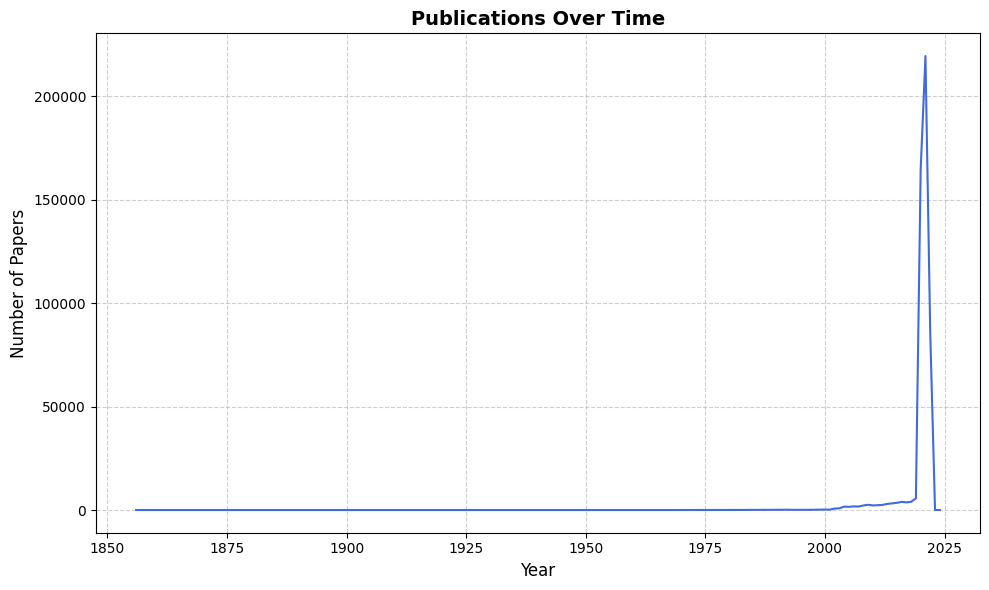

In [ ]:
#Plot the publications per year.
plt.figure(figsize=(10,6))
plt.plot(papers_per_year.index, papers_per_year.values,  linestyle="-", color="royalblue")
plt.title("Publications Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)


plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#Top journals
top_journals = metadata["journal"].value_counts().head(10)

print(top_journals)

journal
PLoS One                           9953
bioRxiv                            8961
Int J Environ Res Public Health    8201
BMJ                                6928
Sci Rep                            5935
Cureus                             4212
Reactions Weekly                   3891
Front Psychol                      3541
BMJ Open                           3515
Front Immunol                      3442
Name: count, dtype: int64


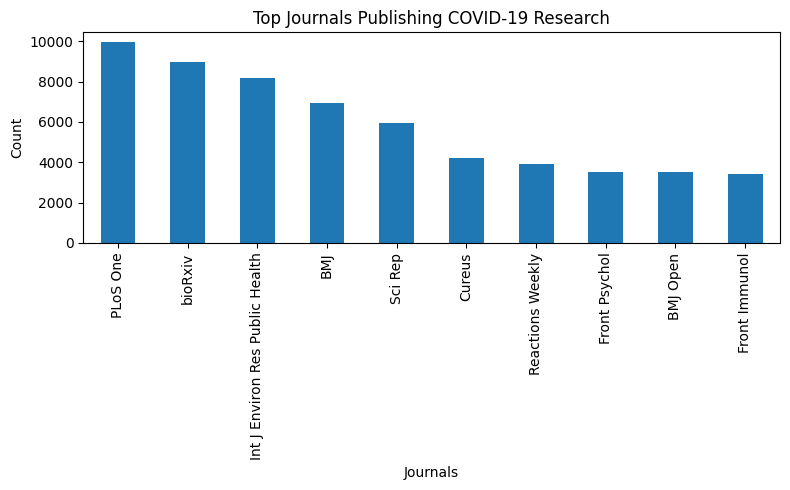

In [ ]:
top_journals.plot(kind="bar", figsize=(8,5))
plt.title("Top Journals Publishing COVID-19 Research")
plt.xlabel("Journals")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
#Most frequent words in titles
titles = " ".join(metadata["title"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)


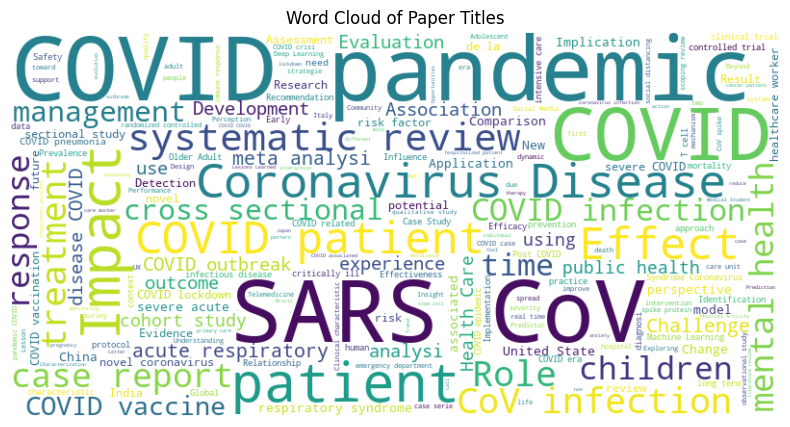

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()

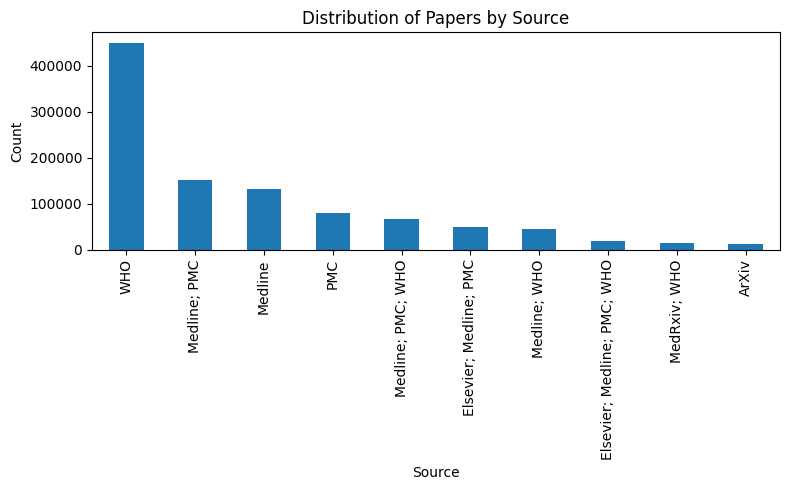

In [ ]:
#Distribution of paper counts by source
if "source_x" in metadata.columns:
    metadata["source_x"].value_counts().head(10).plot(kind="bar", figsize=(8,5))
    plt.title("Distribution of Papers by Source")
    plt.xlabel("Source")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [8]:
metadata = pd.read_csv("metadata_clean.csv")

C:\Users\bmumo\AppData\Local\Temp\ipykernel_30120\1677760606.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("metadata_clean.csv")


In [9]:
# Title and description
st.title("CORD-19 Data Explorer")
st.write("Explore COVID-19 research papers metadata")

2025-09-22 09:58:33.478 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:58:35.404 
  command:

    streamlit run c:\Users\bmumo\Documents\SED\PYTHON\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-22 09:58:35.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:58:35.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:58:35.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:58:35.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:58:35.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [10]:
# Interactive year range slider
min_year = int(metadata["year"].min())
max_year = int(metadata["year"].max())
year_range = st.slider("Select Year Range", min_year, max_year, (2020, 2021))

2025-09-22 09:59:10.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:59:10.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:59:10.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:59:10.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:59:10.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 09:59:10.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [11]:
# Filter dataset
filtered_df = metadata[(metadata["year"] >= year_range[0]) & (metadata["year"] <= year_range[1])]

In [12]:
# Show sample of data
st.subheader("Sample Data")
st.write(filtered_df.head())

2025-09-22 10:00:13.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:13.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:13.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:13.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:13.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:13.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [13]:
# Publications per year
st.subheader("Publications per Year")
papers_per_year = filtered_df["year"].value_counts().sort_index()
fig, ax = plt.subplots()
papers_per_year.plot(kind="bar", ax=ax)
ax.set_title("Number of Publications per Year")
st.pyplot(fig)

2025-09-22 10:00:32.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:32.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:32.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:33.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:33.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:33.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:33.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [14]:
# Top Journals
st.subheader("Top Journals")
top_journals = filtered_df["journal"].value_counts().head(10)
fig, ax = plt.subplots()
top_journals.plot(kind="bar", ax=ax)
ax.set_title("Top Journals Publishing COVID-19 Research")
st.pyplot(fig)

2025-09-22 10:00:46.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:46.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:46.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:46.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:46.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:46.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:00:46.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [15]:
# Word Cloud of Titles
st.subheader("Word Cloud of Titles")
titles = " ".join(filtered_df["title"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")
st.pyplot(fig)

2025-09-22 10:01:01.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:01:01.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:01:01.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:01:51.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:01:52.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:01:52.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 10:01:52.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()